# Stacked Regressions to predict House Prices 


## Serigne

**July 2017**

* Link : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

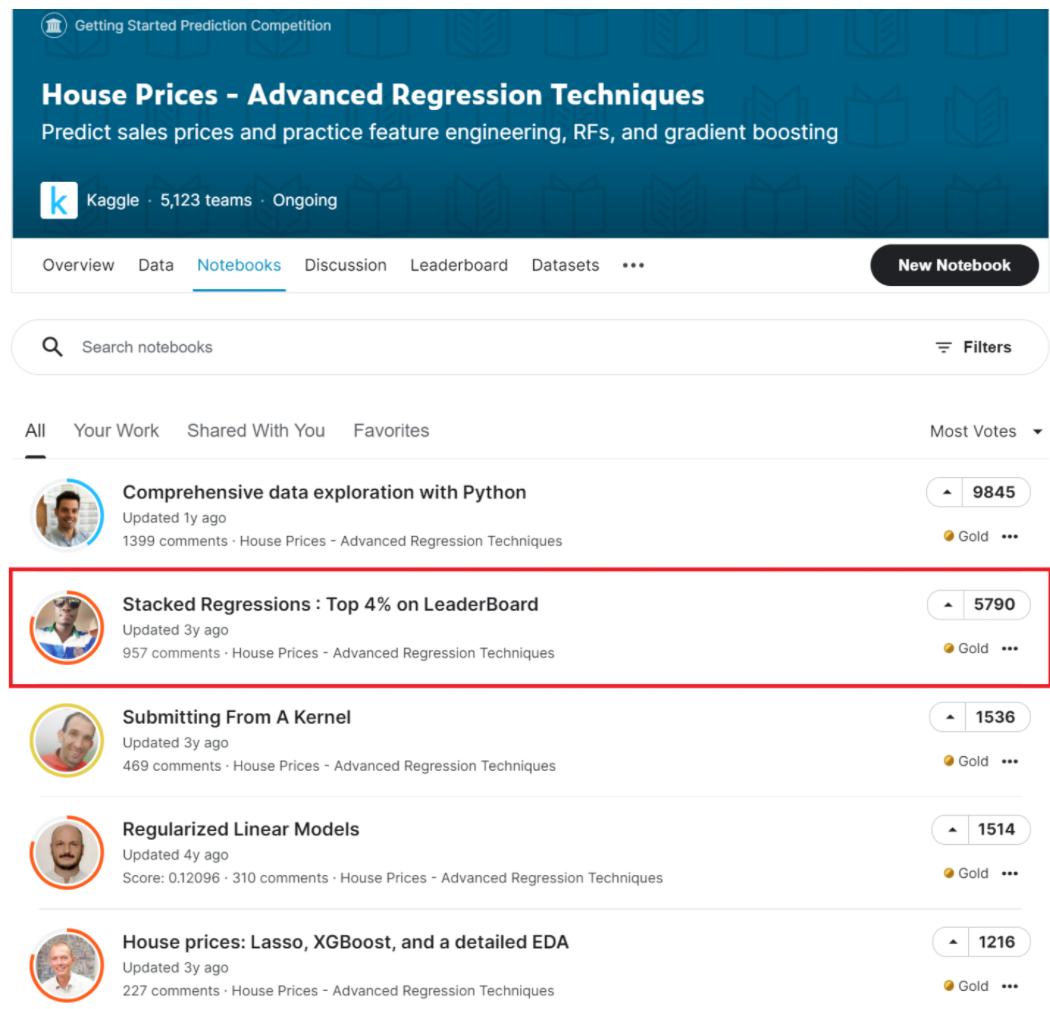


* Subject : House Prices - Advanced Regression Techniques
* Overview  
 - 주택 구입자들이 집을 선택하는 기준에 영향을 끼치는 변수가 무엇인지 알고자함
 - 아이오와주 에임스에 있는 주택의 모든 측면을 설명하는 79개의 변수를 담은 데이터를 활용하여 각 주택의 최종 가격을 예측하는 문제
* Goal  
 - 목표는 각 주택의 가격을 예측하는 것
 - 각 Test set에 있는 ID(주택식별기호)들의 판매 가격을 예측해야 함
* Evaluation Metric
 - 예측가격과 실제 판매 가격에 Log를 씌운 값의 RMSE(Root-Mean-Squared-Error)로 평가 -> RMSLE방식과 동일
 - Log를 씌우는 이유는 가격이 비싼 주택일수록 예측 결과 오류가 전체 오류에 미치는 비중이 높으므로 이를 상쇄하기 위함
* Submission File Format
 - 최종적으로 학습된 모델을 통해 Test Data Set를 분석하여 각각의 ID별 Predicted SalePrice로 이루어진 시트 제출
 
* Data Description
 - train.csv - the training set
 - test.csv - the test set
 - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
 - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms


* Import Package

In [35]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [36]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


# Data Preprocessing

## Drop Variable

* Index : 'ID'
    - 각 Data Set에서 Index역할을 하는 'ID'는 삭제
* Target : 'SalePrice'
    - Train Data에는 Target Variable인 'SalePrice'가 존재 Test Set에는 없음

* Train Dataset

In [79]:
##display the first five rows of the train dataset.
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


* Test Dataset

In [38]:
##display the first five rows of the test dataset.
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


* Checking Dataset Shape and Drop 'ID' variable

In [39]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Outliers

* 이상치 데이터
    - 회귀 계수가 높은 피처가 대상
    - 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터를 처리
  
* 회귀 계수

    $$ Y = W_1 * X_1 + W_2 * X_2 + W_3 * X_3 ... + W_n * X_n $$
    
      
  - 선형 회귀식에서 독립변수의 값에 영향을 미치는 W가 회귀 계수
  - Regression을 통한 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
  - 따라서 예측에 가장 많은 영향을 미치는 회귀 계수가 높은 피처의 이상치를 처리하여야 예측 성능이 높아질 수 있음
  - 뿐만 아니라, 모델별로 예측에 영향을 미치는 피처가 다를 수 있으므로 동일한 Consensus를 갖는 피처들을 찾을 필요가 있음

  
* 회귀 계수가 높은 피처를 찾아내는 방식  
    ① 데이터를 정규화 : Target Variable의 Log Transformation  
    ② Null값 처리 : 불필요 칼럼을 삭제(모델 복잡도 줄임), 평균값으로 대체  
    (※문자형 피처들은 One-Hot Enconding을 통하여 문자형을 숫자형으로 변환하는 동시에 Null값을 'None'으로 대체 (get_dummies()활용))  
    ③ 모델의 하이퍼파라메터 튜닝을 통한 모델의 성능 향상  
    ④ 각 피처들의 왜곡도를(Skewness) 확인하여 로그 변환  
    ⑤ 이후 각 모델별 회귀 계수를 확인  
    
      
* LinearRegrerssion, Ridge, Lasso 모델에서 가장 큰 회귀 계수를 가지는 'GrLivArea'의 이상치를 제거

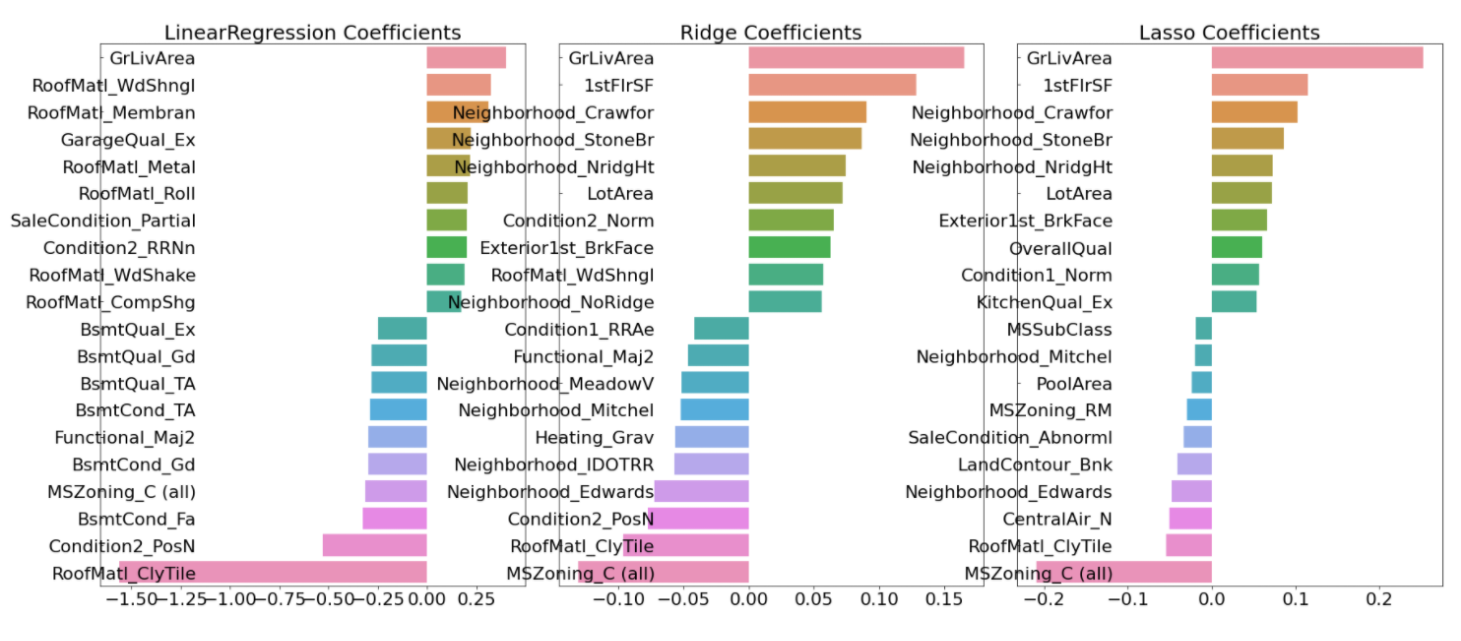

* Scatter Plot으로 GrLivArea - SalePrice간의 그래프를 그려서 Outlier를 확인
* Outlier : GrLivArea가 4000보다 크고 SalePrice가 300000 작은 영역
* 모든 이상치를 제거하는 것은 모델에 악영향, Robust Model 를 위해 남겨둠

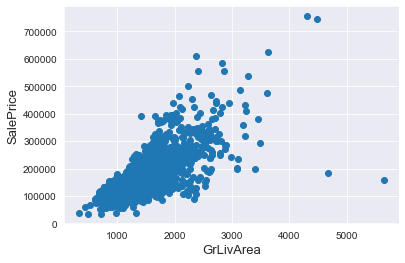

"\nfig, ax = plt.subplots()\nax.boxplot(train['GrLivArea'])\nplt.show()\n"

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()
'''
fig, ax = plt.subplots()
ax.boxplot(train['GrLivArea'])
plt.show()
'''

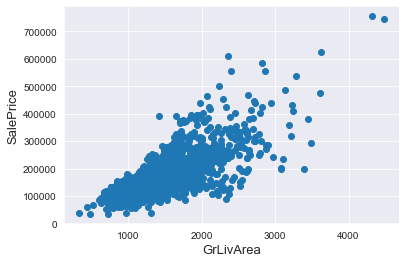

In [41]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Target Variable


 mu = 180932.92 and sigma = 79467.79



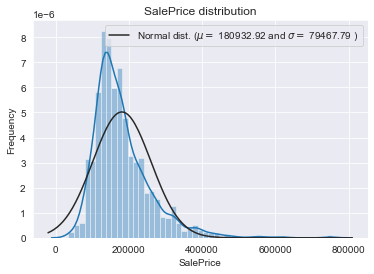

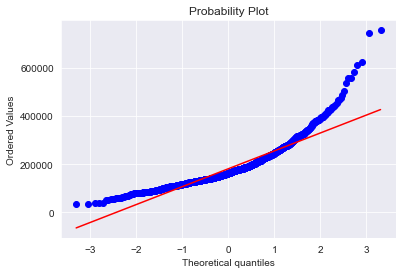

In [42]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

* Target Variable의 분포를 히스토그램과 가우시안분포를 비교하여 Skewness를 확인
    - Target Variable이 정규 분포 형태를 이루고 있지 않다면, 극대값과 극소값에 의하여 결과에 왜곡이 나타남 (=예측 결과에 영향을 줌)
    - 따라서 Target Variable에 Log를 취하여 정규 분포 형태로 만들어줌
    (https://igija.tistory.com/172)
* Distplot(분포도)의 평균과 표준편차를 확인
    - 평균 : 180932.92
    - 편차 : 79467.79
* QQ-Plot을 통해 Data가 정규 분포에 가까운지도 확인

 **Log-transformation of the target variable**


 mu = 12.02 and sigma = 0.40



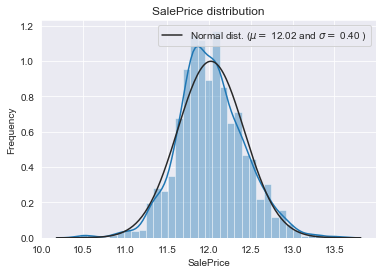

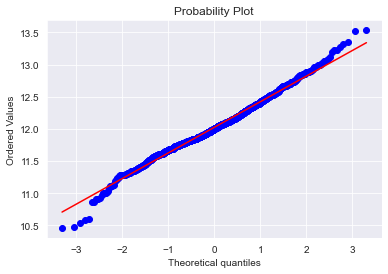

In [43]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


* Log 변환 후 분포도와 평균, 편차 값을 확인
    - Target Variable의 분포가 평균 12, 편차 0.4로 Skewness또한 Symmetrical Distribution의 형태로 변경된 것을 확인
    - QQ-Plot상에서도 일직선에 가까워져 정규화가 진행된 것을 확인할 수 있음

## Features engineering

* train, test dataset을 이어붙여 전체 데이터에 대한 사이즈를 구하고 전체 데이터에 대한 Features Engineering 수행
    - Feature Engineering을 위해서 target값인 'SalePrice'는  삭제

In [44]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### Missing Data

* 다음의 수식을 활용하여 NA 비율을 구한후, 가장 비율이 높은 30개의 Feature를 확인
    - 전체 데이터의 NA비율 = (전체 데이터NA합 / 전체 데이터 갯수)*100
* 18개 정도의 Feature들이 Missing Data가 굉장히 많은 것이 확인 가능

In [56]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

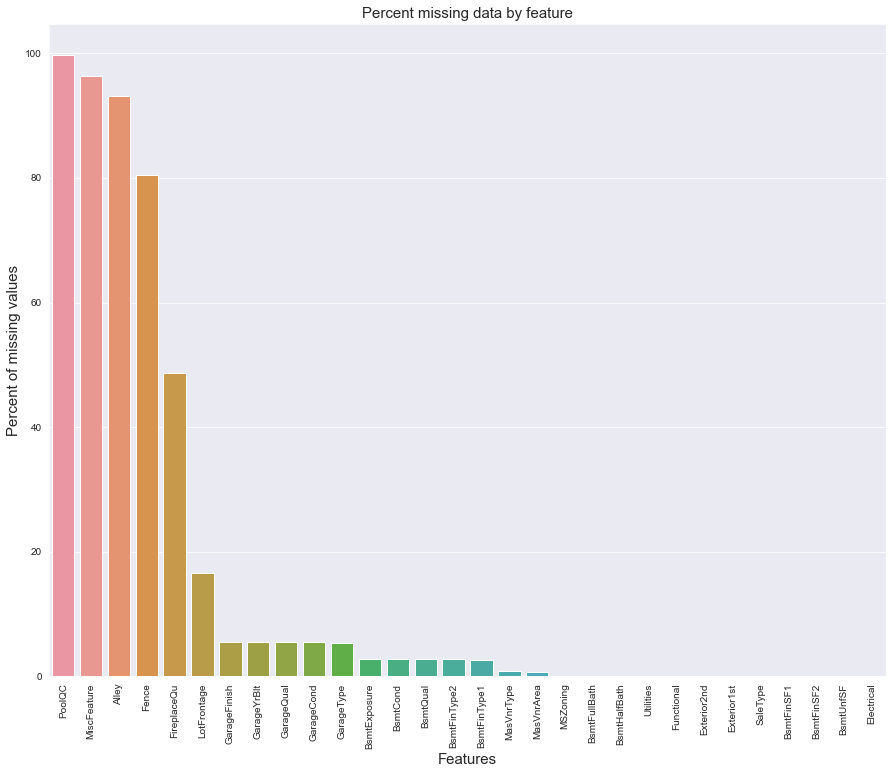

In [48]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Data Correlation**


* Heatmap을 그려봄으로써 Feature들간의 상관관계를 확인
    - OverallQual, GrLivArea, FullBath, GarageCars, GarageArea 등이 상관관계가 높음

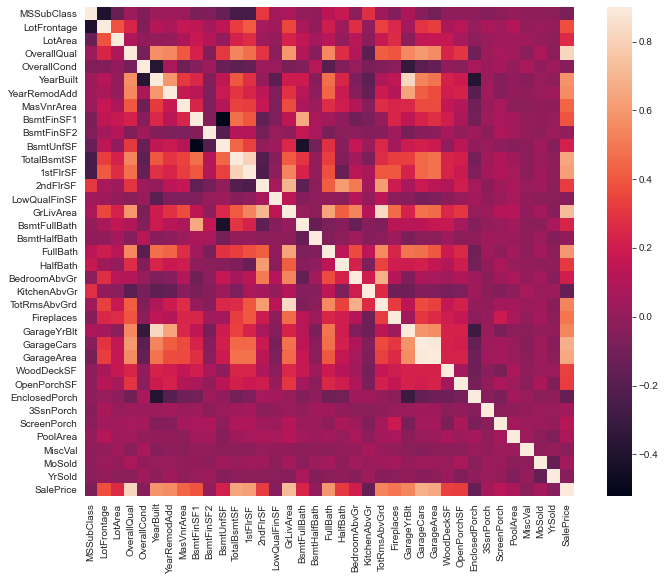

In [69]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Imputing missing values 

- **PoolQC** : 주택에 풀장을 포함하고 있느냐를 나타낸 변수로, NA는 풀장을 포함하지 않는다는 의미임. 따라서 'None'으로 설정.

In [16]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : NA의 "기타 시설 없음"을 의미

In [17]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : 데이터 설명에 따르면 NA는 "골목 액세스 금지"를 의미합니다.

In [18]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence** : 데이터 설명에 따르면 NA는 "펜스 없음"을 의미합니다.

In [19]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : 데이터 설명에 따르면 NA는 "벽난로 없음"을 의미합니다.

In [20]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : 주택의 앞마당 넓이는 인근 지역의 다른 주택과 유사한 면적을 가지고 있기 때문에, 앞마당 넓이 중앙값으로 결측값을 채울 수 있습니다.

In [21]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond** : 결측치를 'None'으로 대체

In [22]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : 결측치를 0으로 대체 (Since No garage = no cars in such garage.)


In [23]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : 지하실이 없는 경우 결측치이므로 0으로 대체

In [24]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : 지하실이 없는 경우 결측치이므로 'None'으로 대체


In [25]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea and MasVnrType** : NA는 이 집들을 위한 석조 베니어판이 없다는 것을 의미. 면적은 0, 타입은 None으로 채울 수 있습니다.


In [26]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (The general zoning classification)** :  어떤 구역이냐를 나타내는 변수로 'RL' - Residential Low-density zone (주거저밀도지역)으로 결측값을 채울 수 있다. (mode연산은 최빈값을 리턴하는 함수)


In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : 이 범주형 특성의 경우, "NoSeWa" 1개 및 2 NA를 제외한 모든 레코드는 "AllPub"입니다. "NoSewa"가 있는 집은 training set에 있으므로 이 피처는 예측 모델링에 도움이 되지 않습니다. 따라서 제거함.

In [28]:
all_data = all_data.drop(['Utilities'], axis=1)

- **Functional** : 데이터 설명에 따르면 NA는 일반적이라는 의미임

In [29]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : 하나의 NA 값이 있습니다. 이 피처의 대부분은 'SBrkr'이기 때문에 'SBrkr'로 설정


In [30]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual**: 단 하나의 NA 값만, Electrical과 마찬가지로 KitchenQual에서 누락된 값에 대해 'TA'(가장 빈번한 값)를 설정.


In [31]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : Exterior 1 & 2 모두 하나의 결측치만 있음. 최빈값으로 설정

In [32]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : Saletype도 최빈값으로 설정

In [33]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Na는 건물 클래스가 없다는 뜻임. 결측값을 'None'으로 설정


In [34]:

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")



Is there any remaining missing value ? 

In [35]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


It remains no missing value.


###More features engeneering

**Transforming some numerical variables that are really categorical**
* Label Encoding으로 Numerical Data변환을 위해서 MSSubClass, OverallCond, YrSold, MoSold 피처들을 Str형태로 변환(=카테고리형 데이터)
* Label Encoding의 장점은 Class들의 정보도 함께 담고 있기 때문에 어떤 Class가 숫자로 맵핑되어 있는지 확인이 가능하다

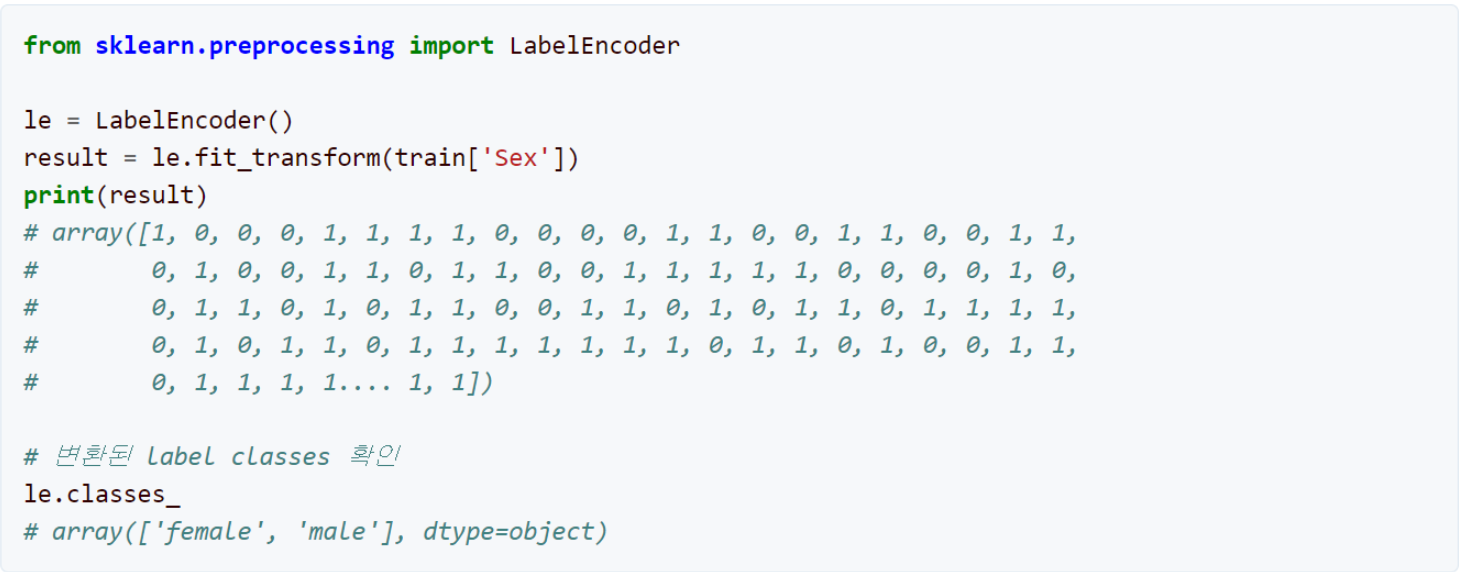

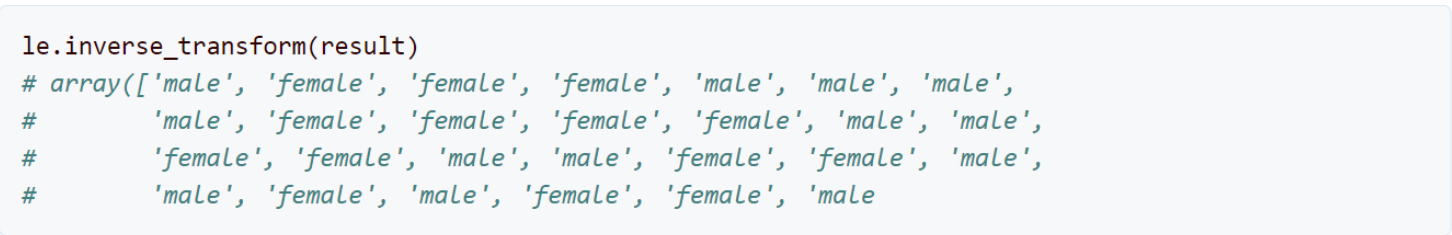

In [71]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

**Label Encoding some categorical variables that may contain information in their ordering set** 

In [73]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))




Shape all_data: (2917, 79)


**Adding one more important feature**
* 주택의 총 층수를 구하기 위해서 지하실부터 1층과 2층의 레벨을 더해서 새로운 피처 생성

In [38]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


**Skewed features**

* 피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있음
* 따라서 숫자형 피처의 데이터 분포를 확인하여 왜곡도를 수정해 주어야 함
* 사이파이 state모듈의 skew()함수를 이용하여 칼럼의 데이터 세트의 왜곡된 정도를 추출
* skew() 함수의 반환 값 na일 경우는(=왜곡되지 않은 경우) drop하고 아닐 경우 skewed_feats라는 변수에 skewness값 저장
* skewness 데이터프레임에 'Skew' 변수라는 이름으로 skewed_feats의 정보를 할당

In [78]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.143683
EnclosedPorch,4.002344
ScreenPorch,3.945101


**Box Cox Transformation of (highly) skewed features**

* 각 피처별로 절대값 skewness가 0.75보다 큰 피처의 경우 boxcox변환을($\lambda = 0.15$) 통해서 적절하게 정규화를 시켜줍니다
* Box-Cox 변환은 옵션(Lambda)값에 따라 Log변환과 제곱근, 또는 지수변환도 가능하기 때문에 널리 쓰인다
    (http://onlinestatbook.com/2/transformations/box-cox.html)
* Box-Cox 변환 공식, ($Y_i$는 원래 데이터 값이고 $\lambda$는 변환에 대한 모수임)  
    $W_i = Y_i^\lambda, (\lambda \not\equiv 0)$  
    $W_i = Ln(Y_i), (\lambda = 0)$

In [40]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


**Getting dummy categorical features**

* get_dummies함수를 통해서 one-hot encoding으로 피처를 변환

In [41]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


Getting the new train and test sets. 

* train데이터와 test 데이터를 다시 나누어줌

In [42]:
train = all_data[:ntrain]
test = all_data[ntrain:]


#Modelling

**Import librairies**

In [43]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



**Define a cross validation strategy**

* KFold로 Data를 Split하여 Cross Validation하여 RMSE값을 리턴해주는 함수 정의

In [44]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

##Base models

## 규제 선형 모델의 개요

- 편향을 조절하는 것 : 실제 값과 예측값의 차이를 최소화 (=RSS)
- 분산을 조절하는 것 : 회귀 계수의 크기를 최소화(=Degree)
- 비용 함수가 RSS만 고려할 경우 → 회귀 계수가 커짐 → 과적합 → 따라서 과적합을 방지하는(=회귀 계수 값이 커지지 않기위한) 방법이 서로 균형을 이뤄야 함
- 규제 (Regularization)
    - 회귀 계수의 크기를 제어해 과적합을 개선하는 것
- 방식 ( Cost (W) = Min(RSS + a x (계수합))
    - 비용 함수에 alpha 값으로 패널티를 부과하여 회귀 계수 값의 크기를 감소
        - alpha값과 적합도의 Trade Off

            → alpha = 0 (또는 매우 작은값)인 경우 :

            $alpha  * ||W||_2^2$ = 0 (또는 작은 값) → 회귀 계수가 커짐 → 학습 데이터 적합도가 상승

            → alpha = ∞ (또는 매우 큰값)인 경우 : 

            $alpha  * ||W||_2^2$ = ∞ (또는 큰 값) →  회귀 계수가 작아짐 → 학습 데이터 과적합을 개선할 수 있음

- 분류
    - Cost Function에 항을 추가하는데, 이 형태에 따라 L1, L2 Regulation으로 분류함
    - L1 방식 : Manhattan Distance 또는 Taxicab 표준이라고 부름 (λ = 1 일 때).
        - L1 Norm은 공간에서 벡터 크기의 합
        - 가중치의 절대값 합에 비례하여 가중치에 패널티를 주는 규제 유형
        - 관련성이 없거나 매우 낮은 특성의 가중치를 0으로 유도하여 영향을 크게 미치는 핵심 Features만 반영하도록 함
        - Lasso 회귀 방식에 사용됨  
         $비용 함수 목표 = Min(RSS(W) + \alpha  * ||W||_2 )$  
    - L2 방식 : 유클리드 Norm (λ = 2 일 때)이라고 함 (가장 인기있는 Norm)
        - 한 지점에서 다른 지점으로 이동할 수있는 최단 거리를 나타냄
        - 가중치 제곱의 합에 비례하여 가중치에 패널티를 주는 규제 유형
        - 아주 높거나 아주 낮은 이상치에 대해서 0에 가깝게 유도하는 데 도움이 됨
        - Ridge 회귀 방식에 사용됨  
        $비용 함수 목표 = Min(RSS(W) + \alpha  * ||W||_2^2 )$  
    - L1 + L2방식 : L1규제와 L2규제를 결합한 회귀 방식
        - Lasso회귀(L1규제)가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강함
        - 이러한 성향으로 말미암아 alpha값에 따라서 회귀 계수의 값이 급격히 변동할 수도 있기에 L2규제를 라쏘 회귀에 추가한 방식
        - L1과 L2를 결합했기 때문에 그만큼 수행시간이 오래 걸린다는 단점이 있음
        - 엘라스틱넷 회귀 방식에 사용됨

        $비용 함수 목표 = Min(RSS(W) + \alpha_2  * ||W||_2^2 + \alpha_1  * ||W||_1)$  

    [[Part Ⅲ. Neural Networks 최적화] 2. Regularization - 라온피플 머신러닝 아카데미 -](https://m.blog.naver.com/laonple/220527647084)

* Pipeline과 RobustScaler()
    * Pipeline
        * 범주형 변수를 조작하거나 스케일링 및 정규화와 같은 많은 데이터 변환이 수행되어야 함. 
        * Scikit-Learn은 전처리 기능에 일반적으로 사용되는 대부분의 기능을 내장하고 있음.
        * 그러나 일반적인 기계 학습 워크플로우에서는 이러한 모든 변환을 두 번 이상 적용해야 함.
        * 모델을 교육할 때 한 번 그리고 예측하고자 하는 모든 새로운 데이터에 대해 다시 한 번하기 때문 
        * 물론 재사용하는 기능을 쓸 수 있지만 먼저 실행하고 나서 모델을 따로 불러야 함 
        * Scikit-Learn pipeline은 이 과정을 단순화하는 도구임
    * RobustScaler()
        * 평균과 분산대신, 중간값과 사분위 값을 조정
        * 아주 동 떨어진 데이터를 제거
        * StandardScaler와 비슷 하지만 평균과 분산대신 중간값(median)과 사분위값(quartile)을 사용 
        * 이런 방식 때문에 RobustScaler는 전체 데이터와 아주 동떨어진 데이터 포인트(예를 들면 측정 에러)에 영향을 받지 않음 

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [45]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :

again made robust to outliers

In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Kernel Ridge Regression** :

In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

## 회귀 트리 모델의 개요
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀를 예측하는 방식
- 분류 트리와 크게 다르지 않으며, 다만 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있음
    - 분류 트리 : 특정 클래스 레이블을 결정
    - 회귀 트리 : 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산

- 예를 들어, 피처가 단 하나인 X피처 데이터 세트와 결정값 Y가 2차원 평면상에 있다고 하자
- 데이터 세트의 X피처를 결정 트리 기반으로 분할하면 X값의 균일도를 반영한 지니 계수에 따라 다음 그림①과 같이 분할 할 수 있고, 트리 규칙이 만들어짐
- 리프 노드 생성 기준에 부합하는 트리 분할이 완료된 이후, 리프 노드에 소속된 데이터 값의 평균값을 구해서 최종적으로 리프 노드에 결정 값으로 할당하여 학습, 예측  

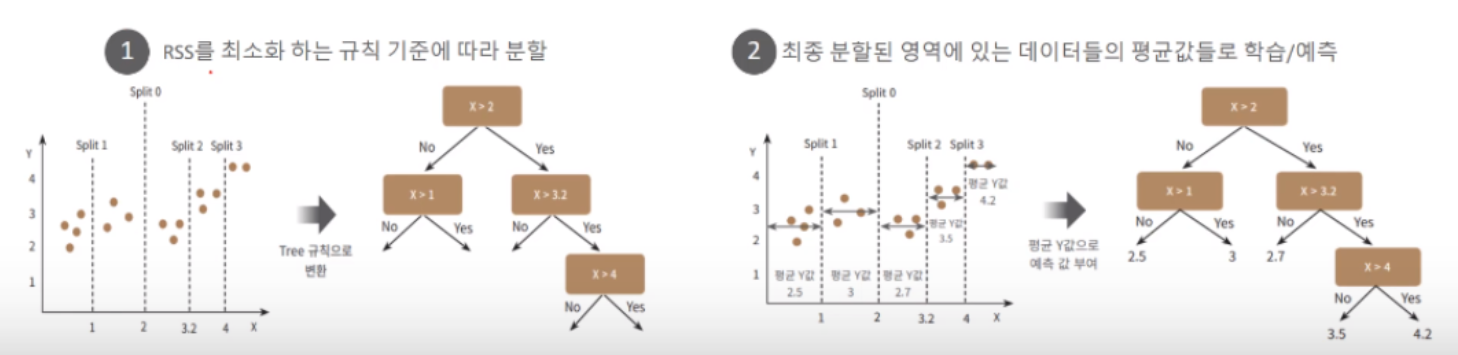
  
- 회귀 트리의 종류
    - 트리 생성이 CART 알고리즘에 기반하고 있기 때문에 모든 트리 기반의 알고리즘은 분류 뿐만 아니라 회귀도 가능함
    - 종류 : Decision Tree, Random Forest, GBM, XGBoost, LightGBM

- Gradient Boosting Regression
- 부스팅 알고리즘은 여러 개의 약한 학습기 (Weak Learner)를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가며 학습하는 방식  
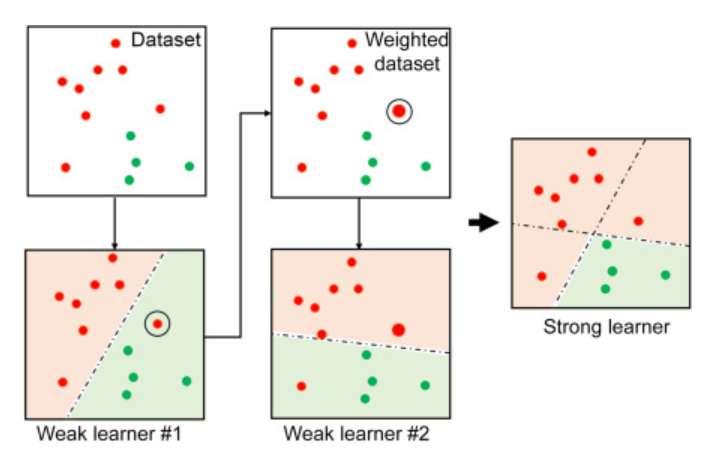
  
    - Gradient Boosting은 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 방식
    - 하이퍼파라미터
        - n_estimators : Weak leaner의 개수를 지정. 디폴트는 100개. 많이 설정할 수록 좋은 성능이 계속해서 향상되는 것은 아님
        - max_depth : 트리의 최대 깊이를 규정하는 파라미터. 디폴트는 None. 결정 값이 될 때까지 깊이를 계속 키우며 분할 또는min_samples_split보다 작아질 때까지 깊이를 증가시킴
        - max_features : 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None = 전체 피처 선정. int형으로 지정하면 대상 피처의 갯수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트, sqrt는 전체 피처에 root를 씌운 갯수 만큼 선정. auto로 지정하면 sqrt와 동일.
        - loss : 경사 하강법에서 사용할 비용 함수를 지정. 디폴트 값은 deviance
        - learning rate : 학습을 진행할 때마다 적용하는 학습률. Weak Learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수. 0~1사이의 값을 지정할 수 있음. 디폴트는 0.1
        - subsample : Weak Leaner가 학습에 사용하는 데이터의 샘플링 비율. 디폴트는 1. 이는 전체 학습데이터를 기반으로 학습한다는 의미

- XGBoost
    - 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘
    - GBM에 기반을 두고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재등의 문제를 해결
    - 병렬 CPU환경에서 병렬 학습이 가능해 GBM보다 빠르게 학습을 완료할 수 있음
    - 하이퍼파라미터
        - 일반파라미터
            - booster : gbtree(tree based model) 또는 gblinear(linear model) 선택, 디폴트는 gbtree.
            - silent : 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1
            - nthread : CPU의 실행 스레드 개수를 조정. 디폴트는 CPU전체 스레드를 다 사용하는 것
        - 부스터 파라미터  
            - **eta : GBM의 학습률(learning rate)와 같은 파라미터. 디폴트는 0.3**  
            - num_boost_rounds : GBM의 n_estimator와 같은 파라미터  
            - **min_child_weight : 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합. 클 수록 분할을 자제. 과적합을 조절하기 위해 사용**  
            - **gamma : 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값. 해당 값보다 큰 손실이 감소된 경우 리프 노드를 분리. 값이 클수록 과적합 감소 효과가 있음**  
            - **max_depth : 트리의 최대 깊이. 0을 지정하면 깊이에 제한이 없음**  
            - **sub_sample : GBM의 subsample과 동일**  
            - **colsample_bytree : GBM의 max features와 유사함. 트리 생성에 필요한 피처를 임의로 샘플링하는데 사용**  
            - lambda : L2 Regulation 적용 값. 피처 개수가 많을 경우 적용하여 값이 클수록 과적합 감소
            - alpha : L1 Regulation 적용 값. 피처 개수가 많을 경우 적용하여 값이 클수록 과적합 감소 효과
            - scale_pos_weight : 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터
        - 학습 태스크 파라미터
            - objective : 최솟값을 가져야할 손실 함수를 정의. 
            - binary : Logistic : 이진 분류일 때 적용
            - multi : softmax : 다중 분류일 때 적용. 손실함수가 multi:softmax일 경우에는 레이블 클래스의 개수인 num_class파라미터를 지정해야 함
            - eval_metric : 검증에 사용되는 함수 정의. 기본값은 회귀인 경우 rmse, 분류일 경우 error  
               
             <span style="color:red"> 
            ※ 과적합 문제가 심각하다면 다음과 같이 적용할 것을 고려할 수 있음</span>
            - **eta값을 낮춥니다 (0.01~0.1) eta값을 낮출 경우 num_round(또는 n_estimators)는 반대로 높여줘야 함
            - **max_depth값을 낮춥니다
            - **min_child_weight 값을 높입니다
            - **gamma값을 높입니다
            - **subsample과 colsample_bytree를 조정 -> 트리의 복잡도를 낮추어 과적합을 낮춤
- LightGBM
    - XGBoost보다 학습에 걸리는 시간이 훨씬 적고, 메모리 사용량도 상대적으로 적음
    - XGBoost와 성능은 별다른 차이가 없으나 기능상의 다양성을 LightGBM이 약간 더 많음
    - 트리 분할 방식
        - 리프 중심 트리 분할(Lear Wise)방식을 사용함
        - 기존의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 트리 분할 방식 사용 (Level Wise) → 오버피팅에 보다 더 강한 구조 때문 → 균형을 맞추기 위한 시간이 필요
        - Light GBM은 트리의 균형을 맞추지 않고, 최대 손실 값 (max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성
        - 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할 수록 예측 오류 손실을 최소화 할 수 있음
 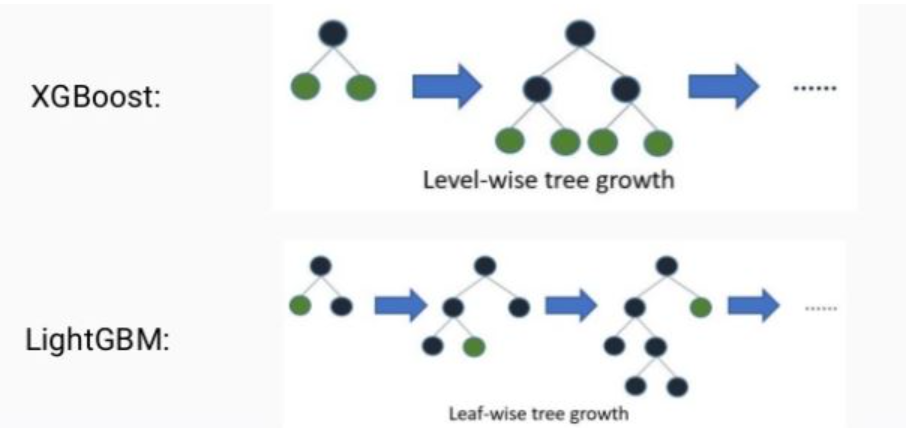
         - 하이퍼 파라미터
            - num_iterations : 반복 수행하려는 트리의 개수를 지정
            - learning rate : 스텝을 반복적으로 수행할 때 업데이트되는 학습률
            - max_depth : 트리 기반 알고리즘의 하이퍼파라미터와 동일
            - min_data_in_leaf : 결정 트리의 min_sample_leaf와 동일
            - num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수
            - boosting : 부스팅 트리를 생성하는 알고리즘을 기술 (gbd, rf)
            - bagging_fraction : 트리가 커져서 과적합 되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정
            - feature_fraction : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
            - lambda_l2 : L2 regulation제어를 위한 값
            - lambda_l1 : L1 regulation제어를 위한 값
            - objective : 최솟값을 가져야할 손실함수를 정의. Xgboost 파라미터와 동일

- **Gradient Boosting Regression** :

With **huber**  loss that makes it robust to outliers
    

In [48]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



- **LightGBM** :

In [50]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

###Base models scores

Let's see how these base models perform on the data by evaluating the  cross-validation rmsle error

In [51]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1115 (0.0074)



In [52]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1116 (0.0074)



In [53]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1153 (0.0075)



In [54]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0083)



In [55]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[21:55:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:55:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [56]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

##Stacking  models

###Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models.  We build a new **class**  to extend scikit-learn with our model and also to laverage encapsulation and code reuse ([inheritance][1]) 


  [1]: https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)

**Averaged base models class**

* Model들의 RMSE값을 취합하여 평균을 내는 모델

In [57]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

We just average four models here **ENet, GBoost,  KRR and lasso**.  Of course we could easily add more models in the mix. 

In [58]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1087 (0.0077)



Wow ! It seems even the simplest stacking approach really improve the score . This encourages 
us to go further and explore a less simple stacking approch. 

###Less simple Stacking : Adding a Meta-model

이 접근법에서, 우리는 평균적인 기본 모델에 메타 모델을 추가하고 이러한 기본 모델의 외부 예측을 사용하여 메타 모델을 훈련시킨다.

Training Part의 절차는 다음과 같이 설명할 수 있다.


1. 전체 Training 세트를 두 개의 분리 세트(여기서 **train** 및 **holdout**)로 나눕니다.)

2. 첫 번째 부분에서 여러 기본 모델 교육(**train**)

3. 두 번째 파트(**holdout**)에서 이러한 기본 모델을 테스트합니다.

4. 3)의 예측(out-of-folds 예측이라고 함)을 입력으로 사용하고 올바른 반응(Target Variable)을 출력으로 사용하여 **meta-model**이라는 상위 레벨 학습자를 교육합니다.

처음 세 단계는 반복적으로 수행됩니다. 예를 들어 5-fold staking을 예로 들면, 먼저 training 데이터를 5fold로 나눕니다. 그럼 5번 반복하겠습니다. 각 반복에서, 우리는 모든 기본 모델을 4개의 fold로 훈련시키고 나머지 fold(holdout fold)에 대해 예측한다.

따라서 5회 반복 후 전체 데이터를 사용하여 out-of-folds에 대한 예측값을 얻은 후, 4단계에서 새로운 피처로서 메타 모델을 훈련시킨다

예측 파트의 경우 테스트 데이터를 기반으로 모든 기본 모델의 예측을 평균화하고 **meta-features**으로 사용했으며, 여기서 최종 예측은 메타 모델로 수행됩니다.

![Faron](http://i.imgur.com/QBuDOjs.jpg)

(Image taken from [Faron](https://www.kaggle.com/getting-started/18153#post103381))

**Stacking averaged Models Class**

In [59]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

To make the two approaches comparable (by using the same number of models) , we just average **Enet KRR and Gboost**, then we add **lasso as meta-model**.

In [60]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0073)


We get again a better score by adding a meta learner

## Ensembling StackedRegressor, XGBoost and LightGBM

We add **XGBoost and LightGBM** to the** StackedRegressor** defined previously. 

* 개별 회귀 모델의 예측 결괏값을 혼합해 이를 기반으로 최종 회귀값을 예측하는 방식
* 가령 A모델과 B 모델, 두 모델의 예측값이 있다면 A모델 예측값의 40%, B 모델 예측값의 60%를 더해서 최종 회귀 값으로 예측하는 방식

We first define a rmsle evaluation function 

In [61]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

###Final Training and Prediction

**StackedRegressor:**

In [62]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07839506096666995


**XGBoost:**

In [63]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

[22:01:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.07876052198274874


**LightGBM:**

In [64]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.07169383068991829


In [65]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07542469505976312


**Ensemble prediction:**

In [66]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

**Submission**

In [67]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

**If you found this notebook helpful or you just liked it , some upvotes would be very much appreciated -  That will keep me motivated to update it on a regular basis** :-)